# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import the model
import inauguralproject as model
hsm = model.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of inauguralproject failed: Traceback (most recent call last):
  File "c:\Users\marcu\Anaconda\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\marcu\Anaconda\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "c:\Users\marcu\Anaconda\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "c:\Users\marcu\Anaconda\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "c:\Users\marcu\Desktop\Kandidat\projects-2023-rvcode-1

# Question 1

**Explain how you solve the model**

In [73]:
# code for solving the model (remember documentation and comments)

dsol = hsm.solve_discrete()

print(f'LM = {dsol.LM:.3f}, LF = {dsol.LF:.3f}, HM = {dsol.HM:.3f}, HF <= {dsol.HF:.3f} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}') 

LM = 4.500, LF = 4.500, HM = 4.500, HF <= 4.500 for alpha and sigma: (0.5, 1.0)


We start our project by adjusting the code. First the parameter H is defined correctly in the py file. Thereafter we continue by defining the descrete function of the hours working in the market and at home. 

Create lists of $\alpha$ and $\sigma$ values and 

In [74]:
#a. Create list with values of alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5,1.0,1.5]

hprel = pd.DataFrame(columns = pd.Index(alpha_list, name="sigma/alpha"), index = pd.Index(sigma_list, name=""))


for alpha in alpha_list:
    for sigma in sigma_list:
        hsm.par.alpha = alpha
        hsm.par.sigma = sigma
        dsol = hsm.solve_discrete()
        HF_HM = dsol.HF / dsol.HM
        hprel.loc[sigma,alpha] = f"{HF_HM:.2f}"

print(hprel)

c:\Users\marcu\Desktop\Kandidat\projects-2023-rvcode-13\inauguralproject\inauguralproject.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))


sigma/alpha  0.25  0.50  0.75
                             
0.5          0.55  1.00  1.83
1.0          0.31  1.00  3.25
1.5          0.21  1.00  4.67


# Question 2

We start by generating a list of of values for wF and setting $\alpha$ and $\sigma$ to their baseline values. wM is set to 1. We then create and empty dataframe, hfhm, to store the new results in. 

We then create a loop based on values in wF_list and the baseline values for $\alpha$ and $\sigma$. By creating a loop the code is on all values given i wf_list. The code generates the ratio between HM and HM which is given by the variable HF_HM that is stored in the dataframe hfhm. Thereafter, the code's two rows in the dataframe given by the values of wF and HF_HM are concatenated into one row by through a conversion to pandas dataframe with HF/HM that gives the ratio between the two. Again this process is repeated for all values in wF_list. 

Thus, at the end our dataframe contains the ratio between HM and HF given by the variable HF/HM and the wF which actually is the ratio between wF and wM since wM = 1.

At last, we take the natural logarithm to both wf and HF/HM and plot them against each other. The plot shows that when the females have lower wages than male, females spend more hours working at home. When the eages are equal or the females only earns a bit less the hours working at home are spend equally and when the females earn more than the males the males tend på work a bit more than the females at home. Thus, the plot shows the general idea, that wage inequality also affect the roles at home.

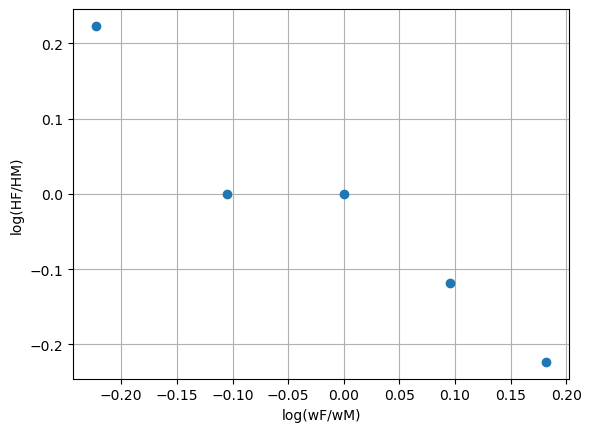

In [75]:
# Create a list of wF and redefine alpha and sigma
wF_list = [0.8, 0.9, 1.0, 1.1, 1.2]
hsm.par.alpha = 0.5
hsm.par.sigma = 1.0

# Create an empty data frame
hfhm = pd.DataFrame(columns=['wF', 'HF/HM'])

# Create a loop similar to question 1 but only for one value
for wF in wF_list:
    hsm.par.wF = wF
    dsol = hsm.solve_discrete()
    HF_HM = dsol.HF/dsol.HM
    row = {"wF": wF, "HF/HM": HF_HM}
    hfhm = pd.concat([hfhm, pd.DataFrame([row])], ignore_index=True)

# Plot the resulst
plt.plot(np.log(hfhm['wF']/hsm.par.wM), np.log(hfhm['HF/HM']),'o')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.grid(True)
plt.show()

# Question 3

We do the same as above in Question 2, however the choice set is continuous. 

We change the choice set to continuous by setting discrete=false when we define home_ratio below. 

The overall development is the same with the same start and end point. However, from wF= 0.9 to wF= 1.1 the data point follows the general development and does not diverge from the negative linear correlation between wF/wM and HF/HM.

[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
[1.25257269 1.00009755 1.         0.9999132  0.82975379]


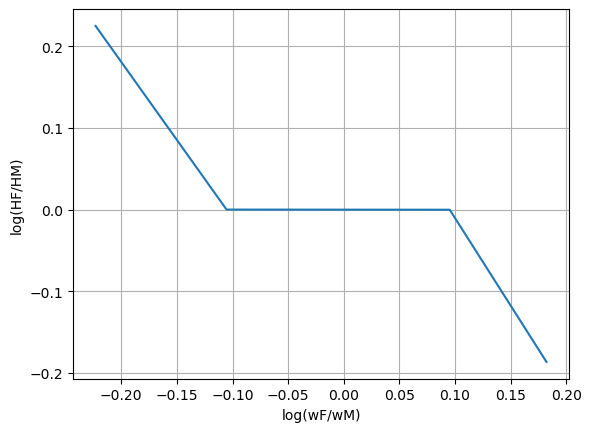

In [76]:
Home_ratio = hsm.solve_wF_vec(discrete = False)

log_w_rat = np.log(hsm.par.wF_vec / hsm.par.wM)

print(log_w_rat)
print(Home_ratio)


# Plot the results
plt.plot(log_w_rat, np.log(Home_ratio))
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.grid(True)
plt.show()


# Question 4

Below our solution to question 4. It is not correct but we are having trouble getting results that seems realistic to what the piper finds.

In [77]:
hsm = model.HouseholdSpecializationModelClass()

par = hsm.par
sol = hsm.sol

def objective (x,*args):
    hsm = args[0]

    alpha, sigma = x
    #print(x)
    #set par
    hsm.par.alpha = alpha
    hsm.par.sigma = sigma

    hsm.solve_wF_vec()
    hsm.run_regression()

    return (par.beta0_target - sol.beta0)**2 + (par.beta1_target - sol.beta1)**2

# Define the bounds for alpha and sigma
bounds = ((0.01, 0.99), (0.01,0.99))

result = minimize(objective, [0.5,0.5], args = (hsm,), bounds=bounds, method='nelder-mead')

alpha, sigma = result.x
print ("alpha:", alpha)
print ("sigma:", sigma)

alpha: 0.9899999999999978
sigma: 0.08789864007171705


From the above results it is clear that women are relatively more productive at home than men: $\frac{0.999}{1-0.999}=99$.

Furthermore the elasticity of substitution is relatively low.

Now presenting the estimated model with minimized alpha and sigma and the Siminski and Yetsenga (2022) regression model.

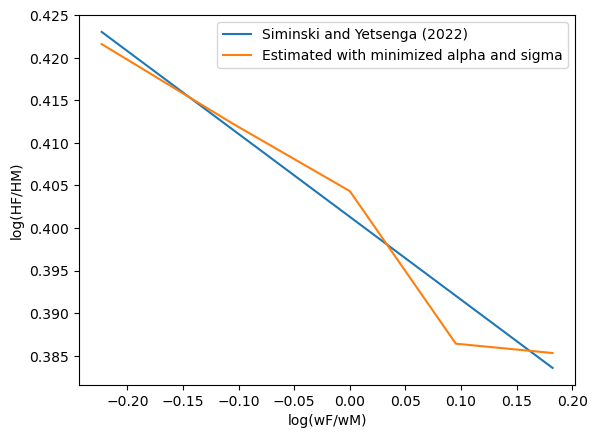

In [78]:
# Creating a vector of x-values
x_values = np.log(hsm.par.wF_vec/hsm.par.wM)

# Using estimated parameters to calculate the corresponding y-values for the regression line
y_values = sol.beta0 + sol.beta1 * x_values

# Add The regression line
plt.plot(x_values, y_values, label='Siminski and Yetsenga (2022)')

#plot results in a plot
plt.plot(logwFwM_ratio, logHFHM_ratio_continous, label='Estimated with minimized alpha and sigma')

plt.legend(loc='upper right')

# Adding labels
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')

plt.show()


# Question 5

Now we want to estimate over sigma and par.nu_new which is an extension to the disutility  function where men gets addtional disutility by working from home.

In [79]:
hsm = model.HouseholdSpecializationModelClass()

par = hsm.par
sol = hsm.sol

def objective (x,*args):
    hsm = args[0]

    sigma, nu_new = x
    #print(x)
    #set par
    hsm.par.sigma = sigma
    hsm.par.nu_new = nu_new

    hsm.solve_wF_vec()
    hsm.run_regression()

    return (par.beta0_target - sol.beta0)**2 + (par.beta1_target - sol.beta1)**2

# Define the bounds for sigma, and nu_new
bounds = ((0.01,0.99), (0.01,0.99))

result = minimize(objective, [0.5,0.5], args = (hsm,), bounds=bounds, method='nelder-mead')

sigma, nu_new = result.x
print ("sigma:", sigma)
print ("nu_new:", nu_new)


sigma: 0.2745564460754393
nu_new: 0.5879170894622798


This indicates that the degree of substitution between women and men in home production have increased from before the increased disutility from men working from home. 

The optimzed value of 0.59 for nu_new shows that disutility of home production for men has now increased relative to women, $\frac{0.588}{(1-0.588)} = 1.427$. 

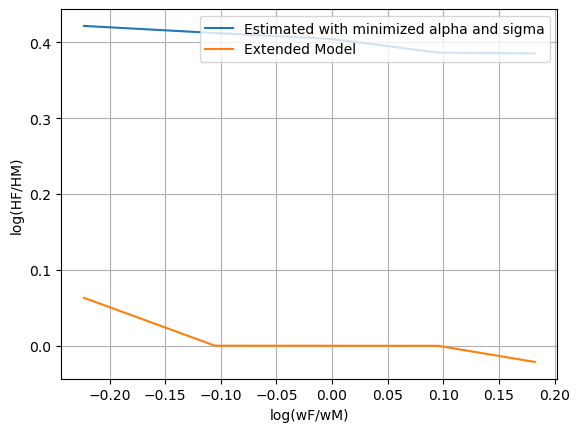

In [87]:
x_values = np.log(hsm.par.wF_vec/hsm.par.wM)

y_values = sol.beta0 + sol.beta1 * x_values

#plotting results in a plot
plt.plot(logwFwM_ratio, logHFHM_ratio_continous, label='Estimated with minimized alpha and sigma')


# Now running the model with the new parameters and get the ratio
Home_ratio = hsm.solve_wF_vec(discrete = False)
log_w_rat = np.log(hsm.par.wF_vec / hsm.par.wM)
y_values_Q5 = np.log(Home_ratio)

# Adding the regression line from Q5
plt.plot(log_w_rat, y_values_Q5, label='Extended Model')

# Add labels, legend and show the plot
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
